In [1]:
# Imports :
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import math
import pandas as pd
#import statsmodels

In [3]:
df = pd.read_table('horse_data23.txt')

In [15]:
df.head()

,experiment,horse,lameLeg,lameSide,lameForeHind,A,S,W,pc1,pc2,pc3,pc4
1,1,B1,none,none,none,-0.002304,-4.513454,-0.013884,0.121519,0.031750,0.046953,0.144889
2,1,B1,none,none,none,-0.045322,-4.453982,-0.012962,0.125487,-0.001296,0.043845,0.125972
3,1,B1,none,none,none,-0.010038,-6.086829,-0.008943,0.122509,-0.096972,0.007267,0.034485
4,1,B1,none,none,none,-0.001488,-4.520627,-0.009451,0.115689,0.129737,0.029682,0.128926
16,1,B2,none,none,none,-0.126048,-5.303123,0.002075,0.114835,-0.032392,0.018564,-0.118194


In [16]:
df.columns

Index(['experiment', 'horse', 'lameLeg', 'lameSide', 'lameForeHind', 'A', 'S',
       'W', 'pc1', 'pc2', 'pc3', 'pc4'],
      dtype='object')

In [4]:
class_names = np.unique(df['lameLeg'])

y = df['lameLeg']

c  =  np.array(pd.get_dummies(y)) @ np.array([1,2,3,4,5])

In [5]:
c

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 4, 4, 2, 2, 1,
       1, 3, 5, 5, 4, 4, 2, 2, 1, 1, 3, 4, 4, 2, 2, 1, 1, 3, 5, 5, 4, 4,
       2, 2, 1, 1, 3, 5, 5, 4, 4, 2, 2, 1, 1, 3, 5, 5, 4, 4, 2, 2, 1, 1,
       3, 5, 5, 4, 4, 2, 2, 1, 1, 3, 5, 5, 4, 4, 2, 2, 1, 1, 3])

In [6]:
for i in range(5):
    print("number of elements in class", class_names[i], ":")
    print(sum(c == i+1))

number of elements in class left:fore :
16
number of elements in class left:hind :
16
number of elements in class none :
23
number of elements in class right:fore :
16
number of elements in class right:hind :
14


# 1.

In [7]:
X1 = df[['A', 'W']]

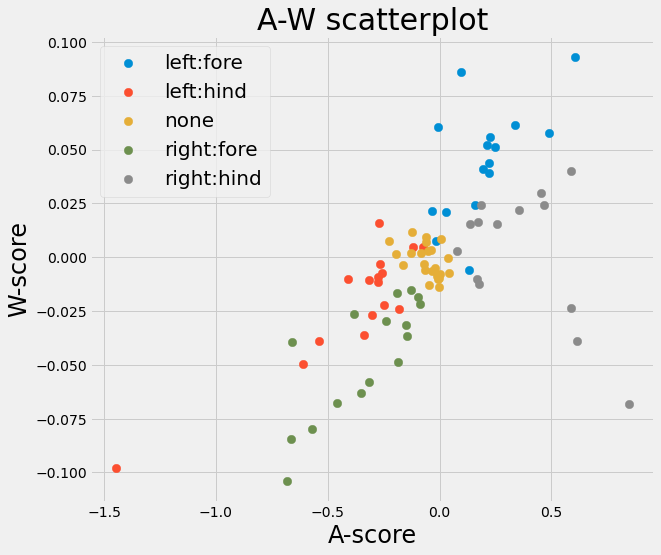

In [8]:
plt.figure(figsize=(9,8))
for i in range(5):
    index = i+1 == c
    plt.scatter(X1['A'][index], X1['W'][index], s = 70, label = class_names[i])

plt.legend(prop = {"size":20})
plt.title('A-W scatterplot', fontsize = 30)
plt.ylabel('W-score', fontsize = 24)
plt.xlabel('A-score', fontsize = 24)
#plt.savefig('picture/scat_1.jpg', bbox_inches="tight")
plt.show()



In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import torch
from sklearn.model_selection import KFold

### **CROSS VALIDATION LOOP**

Pros:
Getting an un-biased accuracy

Cons: 
Variance is diffiult to estimate

In [10]:
horses=["B1","B2","B3","B4","B5","B6","B7","B9"]
n_11=[]
n_10=[]
n_01=[]
n_00=[]
forest_1=0
forest_0=0
log_1=0
log_0=0

forest_acc=[]
for name in horses:
    train_split=(df['horse']!=name)
    test_split=(df['horse']==name)
    X_train=X1[train_split]
    X_test=X1[test_split]
    y_train=y[train_split]
    y_test=y[test_split]
    RandomForestModel = RandomForestClassifier(n_estimators=1000)
    RandomForestModel.fit(X_train, y_train)
    print("RandomForestModel's accuracy:", sum(RandomForestModel.predict(X_test) == y_test)/len(y_test))
    forest_1=RandomForestModel.predict(X_test) == y_test

    LogisticModel = LogisticRegression()
    LogisticModel.fit(X_train, y_train)
    print("LogisticModel's accuracy:", sum(LogisticModel.predict(X_test) == y_test)/len(y_test))
    log_1=LogisticModel.predict(X_test) == y_test
    #Both are corect
    n_11.append(sum(log_1*forest_1))
    # forest is correct log is wrong
    n_10.append(sum(forest_1*(1-log_1)))
    # forest is wrong log is correct
    n_01.append(sum((1-forest_1)*log_1))
    #Both wrong
    n_00.append(sum((1-forest_1)*(1-log_1)))









RandomForestModel's accuracy: 0.6923076923076923
LogisticModel's accuracy: 0.6153846153846154
RandomForestModel's accuracy: 0.46153846153846156
LogisticModel's accuracy: 0.5384615384615384
RandomForestModel's accuracy: 0.9
LogisticModel's accuracy: 0.5
RandomForestModel's accuracy: 0.7692307692307693
LogisticModel's accuracy: 0.5384615384615384
RandomForestModel's accuracy: 0.6666666666666666
LogisticModel's accuracy: 0.4444444444444444


KeyboardInterrupt: 

In [25]:
# Contingency table
contigency=[[n_11[0],n_10[0]],[n_01[0],n_00[0]]]
# difference in accuracy
theta=(n_10[0]-n_01[0])/len(y_test)
print(theta)

0.07692307692307693


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3)

RandomForestModel = RandomForestClassifier(n_estimators=1000)
RandomForestModel.fit(X_train, y_train)
print("RandomForestModel's accuracy:", sum(RandomForestModel.predict(X_test) == y_test)/len(y_test))

###################################################################

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3)

KNeighborsModel = KNeighborsClassifier(n_neighbors=3)
KNeighborsModel.fit(X_train, y_train)
print("K-NeigborsModel's accuracy:", sum(KNeighborsModel.predict(X_test) == y_test)/len(y_test))

##################################################################

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3)

LogisticModel = LogisticRegression()
LogisticModel.fit(X_train, y_train)
print("LogisticModel's accuracy:", sum(LogisticModel.predict(X_test) == y_test)/len(y_test))

##################################################################

X_train, X_test, y_train, y_test = train_test_split(X1.to_numpy(), c-1, test_size=0.3, )

# Parameters for neural network classifier
n_hidden_units = 10     # number of hidden units
n_replicates = 1        # number of networks trained in each k-fold
max_iter = 1000000         # stop criterion 2 (max epochs in training)
tolerance=1e-6
M = 2

X_train, X_test = torch.tensor(X_train, dtype=torch.float), torch.tensor(X_test, dtype=torch.float)
y_train, y_test = torch.tensor(y_train), torch.tensor(y_test)

model = lambda: torch.nn.Sequential(
                    torch.nn.Linear(M, n_hidden_units), #M features to H hiden units
                    torch.nn.Tanh(),   # 1st transfer function,
                    torch.nn.Linear(n_hidden_units, 5), # H hidden units to 1 output neuron
                    torch.nn.Sigmoid() # final tranfer function
                    )
#loss_fn = torch.nn.BCELoss()
loss_fn = torch.nn.CrossEntropyLoss()


logging_frequency = 1000 # display the loss every 1000th iteration
best_final_loss = 1e100
for r in range(n_replicates):
    net = model()

    torch.nn.init.xavier_uniform_(net[0].weight)
    torch.nn.init.xavier_uniform_(net[2].weight)
    
    optimizer = torch.optim.Adam(net.parameters())
    
    # Train the network while displaying and storing the loss
    learning_curve = [] # setup storage for loss at each step
    old_loss = 1e6
    for i in range(max_iter):
        y_est = net(X_train) # forward pass, predict labels on training set
        loss = loss_fn(y_est, y_train) # determine loss
        loss_value = loss.data.numpy() #get numpy array instead of tensor
        learning_curve.append(loss_value) # record loss for later display
        
        # Convergence check, see if the percentual loss decrease is within
        # tolerance:
        p_delta_loss = np.abs(loss_value-old_loss)/old_loss
        if p_delta_loss < tolerance: break
        old_loss = loss_value
        
        # do backpropagation of loss and optimize weights 
        optimizer.zero_grad(); loss.backward(); optimizer.step()
        
    
    if loss_value < best_final_loss: 
        best_net = net
        best_final_loss = loss_value
        best_learning_curve = learning_curve
    
# Return the best curve along with its final loss and learing curve
#return best_net, best_final_loss, best_learning_curve


# Determine estimated class labels for test set
y_sigmoid = net(X_test)

y_test = y_test.type(dtype=torch.uint8)

print("NN's accuracy:", sum(np.argmax(y_sigmoid.detach().numpy(),axis=1)== np.array(y_test))/len(y_test))

RandomForestModel's accuracy: 0.8076923076923077
K-NeigborsModel's accuracy: 0.6153846153846154
LogisticModel's accuracy: 0.3076923076923077
NN's accuracy: 0.4230769230769231


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



print_running_accuracy = False

LogisticModel_accuracy = np.zeros(8)
RandomForest_accuracy = np.zeros(8)
Baseline_accuracy = np.zeros(8)

N_test = np.zeros(8)

# cross-validation loop for each horse
for i in range(8):
    # printing
    print("CV-loop: " + str(i+1)) if print_running_accuracy else print("CV-loop: " + str(i+1), end = '\r') 
    # indexing
    index_test = df['horse'] == np.unique(df['horse'])[i]
    index_train = df['horse'] != np.unique(df['horse'])[i]
    index_test = index_test.to_numpy()
    index_train = index_train.to_numpy()

    # splitting the data
    N_test[i], _ = np.shape(X_train)
    X_train, y_train = X1[index_train], y[index_train]
    X_test, y_test = X1[index_test], y[index_test]
    
    # baseline
    _, counts = np.unique(y_train, return_counts=True)
    Baseline_y_pred = np.unique(df['lameLeg'])[np.argmax(counts)]
    Baseline_accuracy[i] =  sum(y_test == Baseline_y_pred)/len(y_test)
    if print_running_accuracy: print("Baseline's accuracy:", Baseline_accuracy[i])


    # logistic
    LogisticModel = LogisticRegression()
    LogisticModel.fit(X_train, y_train)
    Logistic_y_pred = LogisticModel.predict(X_test)
    LogisticModel_accuracy[i] = sum(Logistic_y_pred == y_test)/len(y_test)
    if print_running_accuracy: print("LogisticModel's accuracy:", LogisticModel_accuracy[i])

    # randomforest
    RandomForestModel = RandomForestClassifier(n_estimators=1000)
    RandomForestModel.fit(X_train, y_train)
    RandomForest_y_pred = RandomForestModel.predict(X_test)
    RandomForest_accuracy[i] = sum(RandomForest_y_pred == y_test)/len(y_test)
    if print_running_accuracy: print("RandomForestModel's accuracy:", RandomForest_accuracy[i])

    
print("--------------------------------------")
print("The mean accuracy for Baseline: ", np.mean(Baseline_accuracy))
print("The mean accuracy for LogisticModel: ", np.mean(LogisticModel_accuracy))
print("The mean accuracy for RandomForestModel: ", np.mean(RandomForest_accuracy))
print("--------------------------------------")
print("The weighted mean accuracy for Baseline: ", np.mean(Baseline_accuracy * N_test/85))
print("The weighted mean accuracy for LogisticModel: ", np.mean(LogisticModel_accuracy*N_test/85))
print("The weighted mean accuracy for RandomForestModel: ", np.mean(RandomForest_accuracy*N_test/85))


--------------------------------------
The mean accuracy for Baseline:  0.24978632478632481
The mean accuracy for LogisticModel:  0.42681623931623924
The mean accuracy for RandomForestModel:  0.7264957264957265
--------------------------------------
The weighted mean accuracy for Baseline:  0.21750377073906485
The weighted mean accuracy for LogisticModel:  0.37210910005027653
The weighted mean accuracy for RandomForestModel:  0.6359225741578682


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



print_running_accuracy = False

LogisticModel_accuracy = np.zeros(8)
RandomForest_accuracy = np.zeros(8)
Baseline_accuracy = np.zeros(8)

N_test = np.zeros(8)

# cross-validation loop for each horse
for i in range(8):
    # printing
    print("CV-loop: " + str(i+1)) if print_running_accuracy else print("CV-loop: " + str(i+1), end = '\r') 
    # indexing
    index_test = df['horse'] == np.unique(df['horse'])[i]
    index_train = df['horse'] != np.unique(df['horse'])[i]
    index_test = index_test.to_numpy()
    index_train = index_train.to_numpy()

    # splitting the data
    N_test[i], _ = np.shape(X_train)
    X_train, y_train = X1[index_train], c[index_train]
    X_test, y_test = X1[index_test], c[index_test]
    
    # baseline
    _, counts = np.unique(y_train, return_counts=True)
    Baseline_y_pred = np.argmax(counts) + 1
    Baseline_accuracy[i] =  sum(y_test == Baseline_y_pred)/len(y_test)
    if print_running_accuracy: print("Baseline's accuracy:", Baseline_accuracy[i])


    # logistic
    LogisticModel = LogisticRegression()
    LogisticModel.fit(X_train, y_train)
    Logistic_y_pred = LogisticModel.predict(X_test)
    LogisticModel_accuracy[i] = sum(Logistic_y_pred == y_test)/len(y_test)
    if print_running_accuracy: print("LogisticModel's accuracy:", LogisticModel_accuracy[i])

    # randomforest
    RandomForestModel = RandomForestClassifier(n_estimators=1000)
    RandomForestModel.fit(X_train, y_train)
    RandomForest_y_pred = RandomForestModel.predict(X_test)
    RandomForest_accuracy[i] = sum(RandomForest_y_pred == y_test)/len(y_test)
    if print_running_accuracy: print("RandomForestModel's accuracy:", RandomForest_accuracy[i])

    
print("--------------------------------------")
print("The mean accuracy for Baseline: ", np.mean(Baseline_accuracy))
print("The mean accuracy for LogisticModel: ", np.mean(LogisticModel_accuracy))
print("The mean accuracy for RandomForestModel: ", np.mean(RandomForest_accuracy))
print("--------------------------------------")
print("The weighted mean accuracy for Baseline: ", np.mean(Baseline_accuracy * N_test/85))
print("The weighted mean accuracy for LogisticModel: ", np.mean(LogisticModel_accuracy*N_test/85))
print("The weighted mean accuracy for RandomForestModel: ", np.mean(RandomForest_accuracy*N_test/85))


--------------------------------------
The mean accuracy for Baseline:  0.24978632478632481
The mean accuracy for LogisticModel:  0.42681623931623924
The mean accuracy for RandomForestModel:  0.7264957264957265
--------------------------------------
The weighted mean accuracy for Baseline:  0.21750377073906485
The weighted mean accuracy for LogisticModel:  0.37210910005027653
The weighted mean accuracy for RandomForestModel:  0.6359225741578682


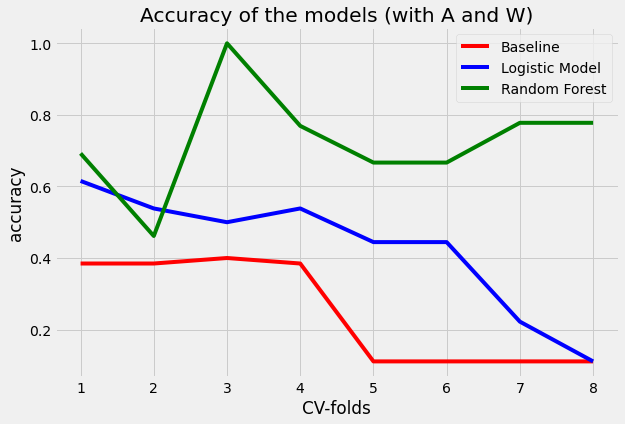

In [124]:
plt.figure(figsize=(9,6))
x = [i+1 for i in range(8)]
plt.plot(x,Baseline_accuracy, 'r-', label = "Baseline") #can be 'r--', 'bs', 'g^'
plt.plot(x,LogisticModel_accuracy, 'b-', label = "Logistic Model") #can be 'r--', 'bs', 'g^'
plt.plot(x,RandomForest_accuracy, 'g-', label = "Random Forest") #can be 'r--', 'bs', 'g^'
plt.ylabel('accuracy')
plt.xlabel('CV-folds')
plt.title('Accuracy of the models (with A and W)')
plt.legend()
#plt.savefig('picture/acc_1.jpg', bbox_inches="tight")
plt.show()

In [179]:
# save data to txt
accucary_A_W = pd.DataFrame(np.column_stack((Baseline_accuracy, LogisticModel_accuracy, RandomForest_accuracy)), columns=["Base", "Log", "Rand"])

accucary_A_W.to_csv('data/A_and_W.txt', header=None, index=None, sep=' ', mode='a')
accucary_A_W

,Base,Log,Rand
0,0.384615,0.615385,0.692308
1,0.384615,0.538462,0.461538
2,0.400000,0.500000,0.900000
3,0.384615,0.538462,0.769231
4,0.111111,0.444444,0.666667
5,0.111111,0.444444,0.666667
6,0.111111,0.222222,0.777778
7,0.111111,0.111111,0.777778


# 2.

In [125]:
X2 = df[['pc3', 'pc4']]

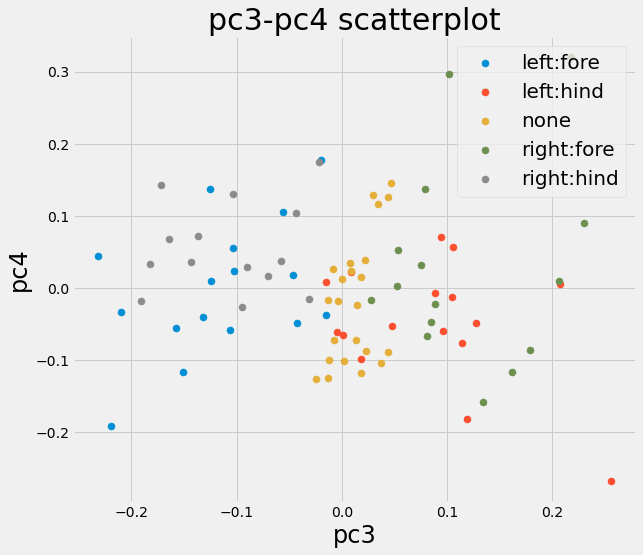

In [163]:
plt.figure(figsize=(9,8))
for i in range(5):
    index = i+1 == c
    plt.scatter(X2['pc3'][index], X2['pc4'][index], s = 50, label = class_names[i])
plt.legend(prop = {"size":20})
plt.title('pc3-pc4 scatterplot', fontsize = 30)
plt.ylabel('pc4', fontsize = 24)
plt.xlabel('pc3', fontsize = 24)
#plt.savefig('picture/scat_2.jpg', bbox_inches="tight")
plt.show()

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



print_running_accuracy = False

LogisticModel_accuracy = np.zeros(8)
RandomForest_accuracy = np.zeros(8)
Baseline_accuracy = np.zeros(8)

# cross-validation loop for each horse
for i in range(8):
    # printing
    print("CV-loop: " + str(i+1)) if print_running_accuracy else print("CV-loop: " + str(i+1), end = '\r') 
    # indexing
    index_test = df['horse'] == np.unique(df['horse'])[i]
    index_train = df['horse'] != np.unique(df['horse'])[i]

    # splitting the data
    X_train, y_train = X2[index_train], y[index_train]
    X_test, y_test = X2[index_test], y[index_test]

    # baseline
    _, counts = np.unique(y_train, return_counts=True)
    Baseline_y_pred = np.unique(df['lameLeg'])[np.argmax(counts)]
    Baseline_accuracy[i] =  sum(y_test == Baseline_y_pred)/len(y_test)
    if print_running_accuracy: print("Baseline's accuracy:", Baseline_accuracy[i])


    # logistic
    LogisticModel = LogisticRegression()
    LogisticModel.fit(X_train, y_train)
    Logistic_y_pred = LogisticModel.predict(X_test)
    LogisticModel_accuracy[i] = sum(Logistic_y_pred == y_test)/len(y_test)
    if print_running_accuracy: print("LogisticModel's accuracy:", LogisticModel_accuracy[i])

    # randomforest
    RandomForestModel = RandomForestClassifier(n_estimators=1000)
    RandomForestModel.fit(X_train, y_train)
    RandomForest_y_pred = RandomForestModel.predict(X_test)
    RandomForest_accuracy[i] = sum(RandomForest_y_pred == y_test)/len(y_test)
    if print_running_accuracy: print("RandomForestModel's accuracy:", RandomForest_accuracy[i])

    
print("--------------------------------------")
print("The mean accuracy for Baseline: ", np.mean(Baseline_accuracy))
print("The mean accuracy for LogisticModel: ", np.mean(LogisticModel_accuracy))
print("The mean accuracy for RandomForestModel: ", np.mean(RandomForest_accuracy))

--------------------------------------
The mean accuracy for Baseline:  0.24978632478632481
The mean accuracy for LogisticModel:  0.26901709401709406
The mean accuracy for RandomForestModel:  0.4976495726495726


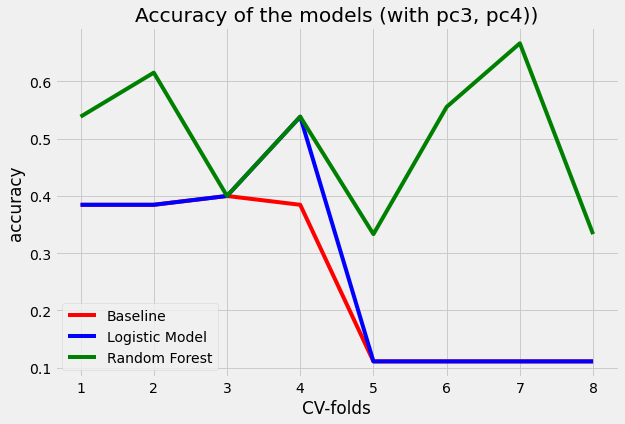

In [128]:
plt.figure(figsize=(9,6))
x = [i+1 for i in range(8)]
plt.plot(x,Baseline_accuracy, 'r-', label = "Baseline") #can be 'r--', 'bs', 'g^'
plt.plot(x,LogisticModel_accuracy, 'b-', label = "Logistic Model") #can be 'r--', 'bs', 'g^'
plt.plot(x,RandomForest_accuracy, 'g-', label = "Random Forest") #can be 'r--', 'bs', 'g^'
plt.ylabel('accuracy')
plt.xlabel('CV-folds')
plt.title('Accuracy of the models (with pc3, pc4))')
plt.legend()
#plt.savefig('picture/acc_2.jpg', bbox_inches="tight")
plt.show()

# 3.

In [129]:
X3 = df[['S', 'W', 'pc3', 'pc4']]

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



print_running_accuracy = False

LogisticModel_accuracy = np.zeros(8)
RandomForest_accuracy = np.zeros(8)
Baseline_accuracy = np.zeros(8)

# cross-validation loop for each horse
for i in range(8):
    # printing
    print("CV-loop: " + str(i+1)) if print_running_accuracy else print("CV-loop: " + str(i+1), end = '\r') 
    # indexing
    index_test = df['horse'] == np.unique(df['horse'])[i]
    index_train = df['horse'] != np.unique(df['horse'])[i]

    # splitting the data
    X_train, y_train = X3[index_train], y[index_train]
    X_test, y_test = X3[index_test], y[index_test]

    # baseline
    _, counts = np.unique(y_train, return_counts=True)
    Baseline_y_pred = np.unique(df['lameLeg'])[np.argmax(counts)]
    Baseline_accuracy[i] =  sum(y_test == Baseline_y_pred)/len(y_test)
    if print_running_accuracy: print("Baseline's accuracy:", Baseline_accuracy[i])


    # logistic
    LogisticModel = LogisticRegression()
    LogisticModel.fit(X_train, y_train)
    Logistic_y_pred = LogisticModel.predict(X_test)
    LogisticModel_accuracy[i] = sum(Logistic_y_pred == y_test)/len(y_test)
    if print_running_accuracy: print("LogisticModel's accuracy:", LogisticModel_accuracy[i])

    # randomforest
    RandomForestModel = RandomForestClassifier(n_estimators=1000)
    RandomForestModel.fit(X_train, y_train)
    RandomForest_y_pred = RandomForestModel.predict(X_test)
    RandomForest_accuracy[i] = sum(RandomForest_y_pred == y_test)/len(y_test)
    if print_running_accuracy: print("RandomForestModel's accuracy:", RandomForest_accuracy[i])

    
print("--------------------------------------")
print("The mean accuracy for Baseline: ", np.mean(Baseline_accuracy))
print("The mean accuracy for LogisticModel: ", np.mean(LogisticModel_accuracy))
print("The mean accuracy for RandomForestModel: ", np.mean(RandomForest_accuracy))

--------------------------------------
The mean accuracy for Baseline:  0.24978632478632481
The mean accuracy for LogisticModel:  0.49487179487179483
The mean accuracy for RandomForestModel:  0.667948717948718


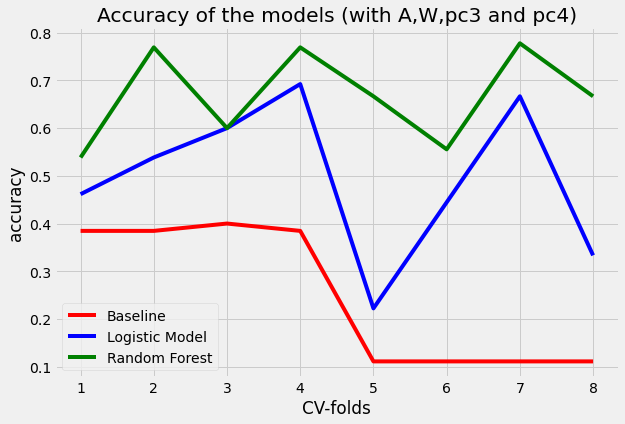

In [131]:
plt.figure(figsize=(9,6))
x = [i+1 for i in range(8)]
plt.plot(x,Baseline_accuracy, 'r-', label = "Baseline") #can be 'r--', 'bs', 'g^'
plt.plot(x,LogisticModel_accuracy, 'b-', label = "Logistic Model") #can be 'r--', 'bs', 'g^'
plt.plot(x,RandomForest_accuracy, 'g-', label = "Random Forest") #can be 'r--', 'bs', 'g^'
plt.ylabel('accuracy')
plt.xlabel('CV-folds')
plt.title('Accuracy of the models (with A,W,pc3 and pc4)')
plt.legend()
#plt.savefig('picture/acc_3.jpg', bbox_inches="tight")
plt.show()